# Introduction to Linear Regression and Gradient Descent

## Linear Regression: The Basics

Linear regression is a fundamental technique in machine learning used to model the relationship between one or more independent variables (features) and a dependent variable (target). At its core, linear regression attempts to fit a linear equation to observed data.

### Simple Linear Regression

Let's start with the simplest case: one feature and one target variable. The equation for simple linear regression is:

$$ y = mx + b $$

Where:
- y is the predicted value
- x is the feature value
- m is the slope (also called the coefficient or weight)
- b is the y-intercept (also called the bias)

Visually, this looks like fitting a straight line to a set of data points:

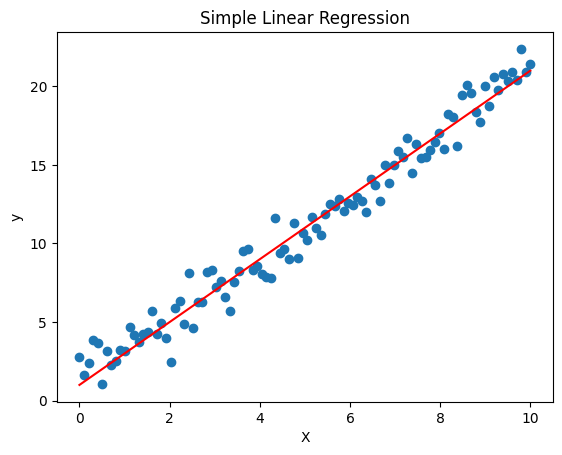

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 1

plt.scatter(X, y)
plt.plot(X, 2*X + 1, color='red')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


### Multiple Linear Regression

When we have multiple features, we extend this concept to multiple dimensions. The equation becomes:

$$ y = w_1x_1 + w_2x_2 + ... + w_nx_n + b $$

Where:
- y is the predicted value
- $x_1, x_2, ..., x_n$  are the feature values
- $w_1, w_2, ..., w_n$ are the weights for each feature
- $b$ is the bias term

This is essentially the same as our simple linear regression, but now we're working in a higher-dimensional space. Instead of fitting a line, we're fitting a hyperplane.

It's important to understand that the core concept remains the same whether we're working with one feature or many. We're still trying to find the best linear relationship between our features and the target variable.



## Gradient Descent: Optimizing Our Model

Now that we understand what linear regression is trying to do, how do we actually find the best values for our weights and bias? One of the most common approaches, used throughout machine learning, is called *gradient descent*.  

## What is a Gradient?

A gradient is a generalization of the concept of a derivative to functions of multiple variables. In the context of machine learning and optimization, the gradient represents the direction and rate of fastest increase of a function at a particular point.

### From Slopes to Derivatives to Gradients

1. **Slope**: In its simplest form, a slope is the steepness of a line. It's calculated as the change in $y$ divided by the change in $x$: $(y_2 - y_1) / (x_2 - x_1)$.

2. **Derivative**: A derivative is the instantaneous rate of change of a function at any given point. It's the limit of the slope as the distance between two points approaches zero. For a function $f(x)$, the derivative is written as $f'(x)$ or $df/dx$.

3. **Gradient**: The gradient is the multi-dimensional extension of the derivative. For a function of multiple variables,  $f(x_1, x_2, ..., x_n)$, the gradient is a vector of partial derivatives with respect to each variable:

   $$\nabla f = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n}\right]$$

   Where $\nabla$ is the gradient operator, and $\frac{\partial f}{\partial x_1}$ is the partial derivative of $f$ with respect to $x_1$.

In the context of linear regression, each component of the gradient represents how much the loss function would change if we slightly adjusted the corresponding weight or bias.

## Determining Gradients

Gradients are determined by calculating the partial derivatives of the function with respect to each of its variables. In practice, this often involves:

1. **Analytical derivation**: Using calculus rules to derive the gradient formula.
2. **Numerical approximation**: Using finite differences to estimate the gradient.
3. **Automatic differentiation**: Leveraging computational graphs to automatically compute gradients (common in deep learning frameworks).

For linear regression, we can analytically derive the gradients. Let's consider the Mean Squared Error (MSE) loss function:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Where $n$ is the number of samples, $y_i$ is the true value, and $\hat{y}_i$ is the predicted value.

For a simple linear regression ($\hat{y} = wx + b$), the gradients are:

$$\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i) \cdot x_i$$
$$\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i)$$

## What is a Loss Function?

A loss function, also known as a cost function or objective function, measures how well our model's predictions match the actual data. It quantifies the "error" or "loss" associated with our current model parameters.

Key points about loss functions:

1. **Purpose**: They provide a single number representing the model's performance, which we aim to minimize.
2. **Choice**: Different problems may require different loss functions. Common choices include:
   - Mean Squared Error (MSE) for regression
   - Cross-entropy for classification
3. **Optimization**: Machine learning algorithms often work by minimizing the loss function through techniques like gradient descent.

For linear regression, we commonly use the Mean Squared Error (MSE) as our loss function. MSE has several desirable properties:
- It's always non-negative (squared terms)
- It penalizes larger errors more heavily (quadratic)
- It's differentiable, allowing us to compute gradients

## Putting it All Together: Gradient Descent

Gradient descent uses the gradients of the loss function to iteratively adjust the model parameters (weights and bias in linear regression) to minimize the loss. The process works as follows:

1. Start with initial parameter values.
2. Compute the gradient of the loss function with respect to each parameter.
3. Update each parameter by subtracting a small step in the direction of its gradient:
    $$w=w-\text{learning\_rate}\cdot\frac{\partial\text{MSE}}{\partial w}$$
    $$b=b-\text{learning\_rate}\cdot\frac{\partial\text{MSE}}{\partial b}$$
4. Repeat steps 2-3 until convergence or for a fixed number of iterations.

The learning rate determines the size of the steps we take. Too large, and we might overshoot the minimum; too small, and convergence will be slow.

Let's visualize this process for a simple 1D optimization problem:


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 5*np.sin(x)

def df(x):
    return 2*x + 5*np.cos(x)

x = np.linspace(-10, 10, 200)
y = f(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.title('Optimization Landscape')
plt.xlabel('x')
plt.ylabel('f(x)')

# Gradient descent
x_current = 8
learning_rate = 0.1
n_iterations = 50

for _ in range(n_iterations):
    plt.scatter(x_current, f(x_current), color='red')
    x_current = x_current - learning_rate * df(x_current)

plt.scatter(x_current, f(x_current), color='green', s=100, label='Final position')
plt.legend()
plt.show()





### The Process of Gradient Descent

1. Start with some initial values for the weights and bias.
2. Calculate the predictions using these current parameter values.
3. Compute the cost (error) between our predictions and the actual target values.
4. Calculate the gradient of the cost with respect to each parameter.
5. Update each parameter by subtracting a small portion of its gradient.
6. Repeat steps 2-5 until the cost converges or we reach a maximum number of iterations.

The "small portion" mentioned in step 5 is determined by the learning rate. A higher learning rate means larger steps, potentially reaching the minimum faster but risking overshooting. A lower learning rate means smaller, more careful steps, but may take longer to converge.


## Advanced: Non-convex cost functions

Note that for more complex problems, the optimization surface may be "non-convex," which means that it might have several local optima, which means that gradient descent can get trapped.  For example:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 4*x**2 + 5*np.sin(x)

def df(x):
    return 4*x**3 - 8*x + 5*np.cos(x)

x = np.linspace(-3, 3, 300)
y = f(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.title('Non-Convex Optimization Landscape')
plt.xlabel('x')
plt.ylabel('f(x)')

# Gradient descent from multiple starting points
learning_rate = 0.05
n_iterations = 50
starting_points = [-2.5, -1, 0, 1, 2.5]
colors = ['red', 'green', 'blue', 'purple', 'orange']
all_trajectories = []

for start, color in zip(starting_points, colors):
    x_current = start
    trajectory = [x_current]
    
    for _ in range(n_iterations):
        x_current = x_current - learning_rate * df(x_current)
        trajectory.append(x_current)
    
    trajectory = np.array(trajectory)
    all_trajectories.append(trajectory)
    plt.scatter(trajectory, f(trajectory), color=color, s=30, alpha=0.5, label=f'Start: {start}')
    plt.plot(trajectory, f(trajectory), color=color, alpha=0.3)
    plt.scatter(trajectory[-1], f(trajectory[-1]), color=color, s=100, edgecolor='black')

plt.legend()
plt.show()

# Print final positions
idx = 0
for start, color in zip(starting_points, colors):
    final_x = all_trajectories[idx][-1]
    idx+=1
    print(f"Starting at {start:.2f}, ended at {final_x:.2f} with value {f(final_x):.2f}")

The preceding example illustrates several different subtle problems.

1. Multiple Local Minima:
   The function we've chosen has multiple local minima. This is a common challenge in complex optimization problems, including many machine learning scenarios. In our example, depending on the starting point, gradient descent may converge to different local minima.

2. Sensitivity to Initial Conditions:
   The final result of the optimization process is highly dependent on the starting point. This highlights the importance of initialization in machine learning models, especially in deep learning where good initialization strategies can significantly impact model performance.

3. Potential for Getting Stuck:
   In some cases, the algorithm might get stuck in a local minimum that is not the global minimum. This is why more advanced optimization techniques often incorporate mechanisms to escape local minima.

4. Plateaus and Saddle Points:
   While not prominently featured in this specific function, many non-convex functions in higher dimensions have plateaus or saddle points where the gradient is close to zero. This can slow down or stall the optimization process.

5. Learning Rate Sensitivity:
   The choice of learning rate becomes more critical in non-convex scenarios. A large learning rate might cause the algorithm to overshoot and miss minima, while a small learning rate might result in slow convergence or getting stuck in poor local minima.

6. Need for Multiple Runs:
   In practice, when dealing with non-convex optimization problems, it's often necessary to run the optimization multiple times from different starting points to increase the chances of finding a good solution.

7. Difficulty in Assessing Global Optimality:
   Unlike convex optimization, where reaching a local minimum guarantees global optimality, in non-convex optimization, it's generally very difficult to determine if a found solution is globally optimal.

Implications for Machine Learning:
- In deep learning, the loss landscapes are typically highly non-convex. This is one reason why training deep neural networks can be challenging and why techniques like stochastic gradient descent, adaptive learning rates, and momentum have been developed.
- Ensemble methods in machine learning can be seen as a way to mitigate the risks associated with non-convex optimization by combining multiple models, each potentially converging to different local optima.
- Techniques like simulated annealing, genetic algorithms, and more advanced variants of gradient descent (e.g., Adam, RMSprop) are often employed to better navigate non-convex landscapes.

This example and discussion highlight why optimization in machine learning is often more complex than simple gradient descent on convex functions, and why ongoing research in optimization algorithms remains crucial for advancing the field.

## Implementing Simple Linear Regression

Linear regression for a simple, one dimensional problem is called Simple Linear Regression.  The heart of this is just the gradient descent. The following code illustrates how this can be done.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.5

# Initialize parameters
w = 0
b = 0
learning_rate = 0.01
n_iterations = 1000

# Lists to store the parameter and MSE history
w_history = [w]
b_history = [b]
mse_history = []

# Gradient descent
for i in range(n_iterations):
    # Make predictions

    y_pred = w * X + b
    
    # Compute MSE
    mse = np.mean((y_pred - y) ** 2)
    mse_history.append(mse)
    
    # Compute gradients partial derivatives because each parameter w and b are independent
    dw = (2 / len(X)) * np.sum((y_pred - y) * X)
    db = (2 / len(X)) * np.sum(y_pred - y)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Store parameter history
    w_history.append(w)
    b_history.append(b)
    
    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {mse:.4f}, w = {w:.4f}, b = {b:.4f}")

# Plot the results
plt.figure(figsize=(12, 4))

# Plot the data and the final regression line
plt.subplot(121)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, w*X + b, color='red')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')

# Plot the MSE history
plt.subplot(122)
plt.plot(mse_history)
plt.title('Mean Squared Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

# Plot parameter convergence
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(w_history)
plt.title('Weight (w) Convergence')
plt.xlabel('Iterations')
plt.ylabel('w')

plt.subplot(122)
plt.plot(b_history)
plt.title('Bias (b) Convergence')
plt.xlabel('Iterations')
plt.ylabel('b')

plt.tight_layout()
plt.show()


# From Simple to Multiple Linear Regression: A Matrix Approach

## Simple Linear Regression

In simple linear regression, we have one independent variable $x$ and one dependent variable $y$. The model is represented as:

$$y = wx + b$$

Where $w$ is the weight (or slope) and $b$ is the bias (or intercept).

For $n$ data points, we can write this as a system of equations:

$$
\begin{align*}
y_1 &= wx_1 + b \\
y_2 &= wx_2 + b \\
&\vdots \\
y_n &= wx_n + b
\end{align*}
$$

## Multiple Linear Regression

In multiple linear regression, we have multiple independent variables $x_1, x_2, ..., x_m$ and one dependent variable $y$. The model is represented as:

$$y = w_1x_1 + w_2x_2 + ... + w_mx_m + b$$

For $n$ data points and $m$ features, we can write this as a system of equations:

$$
\begin{align*}
y_1 &= w_1x_{11} + w_2x_{12} + ... + w_mx_{1m} + b \\
y_2 &= w_1x_{21} + w_2x_{22} + ... + w_mx_{2m} + b \\
&\vdots \\
y_n &= w_1x_{n1} + w_2x_{n2} + ... + w_mx_{nm} + b
\end{align*}
$$

## Matrix Representation

We can represent this system of equations using matrices:

$$\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{b}$$

Where:
- $\mathbf{y}$ is an $n \times 1$ vector of dependent variables
- $\mathbf{X}$ is an $n \times (m+1)$ matrix of independent variables (including a column of 1s for the bias term)
- $\mathbf{w}$ is an $(m+1) \times 1$ vector of weights (including the bias as the last element)

In expanded form:

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} = 
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1m} & 1 \\
x_{21} & x_{22} & \cdots & x_{2m} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm} & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_m \\
b
\end{bmatrix}
$$

## Understanding np.dot

The NumPy function `np.dot` performs matrix multiplication. When we use `np.dot(X, w)`, we're essentially computing the sum of element-wise multiplications for each row of $\mathbf{X}$ with $\mathbf{w}$:

$$
\begin{align*}
y_1 &= x_{11}w_1 + x_{12}w_2 + ... + x_{1m}w_m + 1 \cdot b \\
y_2 &= x_{21}w_1 + x_{22}w_2 + ... + x_{2m}w_m + 1 \cdot b \\
&\vdots \\
y_n &= x_{n1}w_1 + x_{n2}w_2 + ... + x_{nm}w_m + 1 \cdot b
\end{align*}
$$

This operation efficiently computes the predictions for all data points simultaneously.

## Gradient Computation

The gradient of the Mean Squared Error (MSE) loss function with respect to the weights can also be computed using matrix operations:

$$\nabla_w \text{MSE} = \frac{2}{n} \mathbf{X}^T (\mathbf{X}\mathbf{w} - \mathbf{y})$$

Where $\mathbf{X}^T$ is the transpose of $\mathbf{X}$.

This matrix operation efficiently computes the gradients for all weights simultaneously, allowing for vectorized implementations of gradient descent.

## Practical Implementation

In practice, we can implement this in NumPy as follows:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
n_samples = 100
n_features = 2

# Create feature matrix X with two features
X = np.random.randn(n_samples, n_features)

# Create target vector y
true_weights = [2, -3.5]
true_bias = 5
y = np.dot(X, true_weights) + true_bias + np.random.randn(n_samples) * 0.1

# Add a column of 1s to X for the bias term
# np.column_stack concatenates arrays along the second axis (columns)
# np.ones(X.shape[0]) creates an array of 1s with the same number of rows as X
X_with_bias = np.column_stack([X, np.ones(X.shape[0])])

# Initialize weights (including bias) with zeros
# The shape is X_with_bias.shape[1] to match the number of features plus the bias term
w = np.zeros(X_with_bias.shape[1])

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Lists to store the loss history
loss_history = []

# Gradient descent
for i in range(n_iterations):
    # Compute predictions using matrix multiplication
    y_pred = np.dot(X_with_bias, w)
    
    # Compute the loss (Mean Squared Error)
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)
    
    # Compute gradients using matrix operations
    # The transpose of X_with_bias (X_with_bias.T) is used to match dimensions for matrix multiplication
    gradients = (2 / n_samples) * np.dot(X_with_bias.T, (y_pred - y))
    
    # Update weights using gradient descent
    w -= learning_rate * gradients

    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Print the final weights and bias
print("Final weights:", w[:-1])
print("Final bias:", w[-1])

# Visualize the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# For 2D data, we can visualize the regression plane
if n_features == 2:

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original data points
    ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', alpha=0.5)
    
    # Create a meshgrid for the regression plane
    x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    X0, X1 = np.meshgrid(x0_range, x1_range)
    
    # Compute the predicted values for the meshgrid
    Z = w[0] * X0 + w[1] * X1 + w[2]
    
    # Plot the regression plane
    ax.plot_surface(X0, X1, Z, alpha=0.3, cmap='viridis')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Target')
    ax.set_title('Linear Regression in 3D')

    elev = 10   # elevation angle in degrees
    azim = 45   # azimuth angle in degrees
    ax.view_init(elev=elev, azim=azim)
    plt.show()